**IMPORT LIBRARIES**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
from IPython.display import Image
import kaleido


**PROBLEM STATEMENT**
- Understanding the sales in the 2 years.

1.Total sales overall,monthly,yearly,quartery,weekly,per region,per country,per team,per sales person,per category,per product type
  
2.Top performing team,sales person,country,region,product type,category

3.Performance trends

**LOAD DATA**

In [5]:
df=pd.read_csv("sales project.csv")

In [272]:
df.tail(5)

,Sales Person,Team,Country,Region,Product Type,Category,Date,Week,Month,Quarter,Year,Boxes,Sales_Amount,Cost_per_box
9444,Dotty Strutley,Jucies,Canada,Americas,Drinking Coco,Other,14/03/2022,Wk12,Mar,Q1,2022,167,3325.0,9.94
9445,Roddy Speechley,Tempo,Australia,APAC,70% Dark Bites,Bites,09/03/2022,Wk11,Mar,Q1,2022,205,4900.0,5.04
9446,Curtice Advani,Delish,USA,Americas,85% Dark Bars,Bars,04/03/2022,Wk10,Mar,Q1,2022,388,8911.0,10.51
9447,Roddy Speechley,Tempo,UK,Europe,70% Dark Bites,Bites,24/03/2022,Wk13,Mar,Q1,2022,51,1316.0,5.04
9448,Kaine Padly,Delish,Canada,Americas,Fruit & Nut Bars,Bars,01/03/2022,Wk10,Mar,Q1,2022,155,4340.0,4.74


**DROP COLUMNS WITH NaN**

In [10]:
df.drop(columns=["Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18"],inplace=True)


**CONVERT AMOUNT TO SALES AMOUNT THEN DROP AMOUNT COLUMN**

In [13]:
df["Sales Amount"]=df["Amount"]
df.drop(columns="Amount",inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sales Person  9449 non-null   object
 1   Team          9449 non-null   object
 2   Country       9449 non-null   object
 3   Region        9449 non-null   object
 4   Product Type  9449 non-null   object
 5   Category      9449 non-null   object
 6   Cost per box  9449 non-null   object
 7   Date          9449 non-null   object
 8   Week          9449 non-null   object
 9   Month         9449 non-null   object
 10  Quarter       9449 non-null   object
 11  Year          9449 non-null   int64 
 12  Boxes         9449 non-null   int64 
 13  Sales Amount  9449 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


**CONVERT Dtype**

In [18]:
df["Sales_Amount"]=df["Sales Amount"].str.replace(r'[$,]',"",regex="True").astype(float)
df["Cost_per_box"]=df["Cost per box"].str.replace(r'[$,]',"",regex="True").astype(float)
df.drop(columns=["Sales Amount","Cost per box"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales Person  9449 non-null   object 
 1   Team          9449 non-null   object 
 2   Country       9449 non-null   object 
 3   Region        9449 non-null   object 
 4   Product Type  9449 non-null   object 
 5   Category      9449 non-null   object 
 6   Date          9449 non-null   object 
 7   Week          9449 non-null   object 
 8   Month         9449 non-null   object 
 9   Quarter       9449 non-null   object 
 10  Year          9449 non-null   int64  
 11  Boxes         9449 non-null   int64  
 12  Sales_Amount  9449 non-null   float64
 13  Cost_per_box  9449 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


**TOTAL SALES**

Total sales is 46,086,887

In [21]:
total_sales=df["Sales_Amount"].sum()
print("Total Sales:",total_sales)

Total Sales: 46086887.0


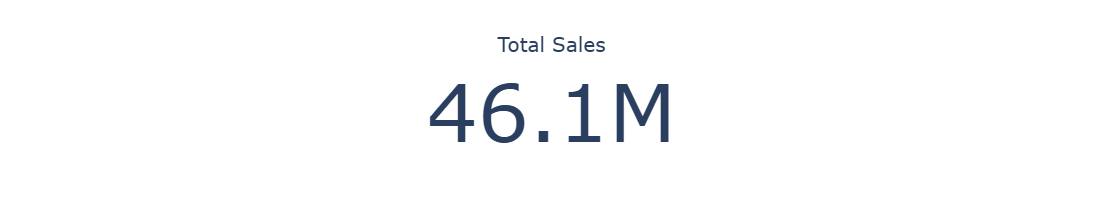

'\n# Save chart as PNG\nfig.write_image("total_sales.png")\n# Display image in notebook (will show on GitHub)\nImage("team_sales_chart.png")\n'

In [274]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = total_sales,
    title = {"text": "Total Sales"}))
fig.update_layout(
    font=dict(size=18),
    width=500,  #  width size
    height=200,  # height size
    margin=dict(l=20, r=20, t=40, b=20))  # smaller margi

fig.show()
"""
# Save chart as PNG
fig.write_image("total_sales.png")
# Display image in notebook (will show on GitHub)
Image("team_sales_chart.png")
"""

**YEARLY SALES**

In 2021, total sales is $34,868,092

In 2022, total sales is $11,218,795

So, there was a drop in sales.Why?


In [26]:
years=df["Year"].nunique()
print("Years:",years)

actual_years=df["Year"].unique()
print("Actual years:",actual_years)

yearly_sales=df.groupby("Year")["Sales_Amount"].sum()
print("Yearly sales:",yearly_sales)

Years: 2
Actual years: [2021 2022]
Yearly sales: Year
2021    34868092.0
2022    11218795.0
Name: Sales_Amount, dtype: float64


**Bar Chart**

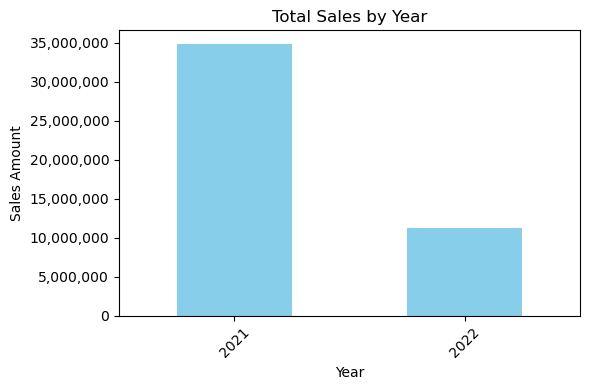

In [29]:
import matplotlib.ticker as ticker

yearly_sales.plot(kind='bar', figsize=(6, 4), color='skyblue')
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales Amount")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Plotly Interactive Bar Chart**

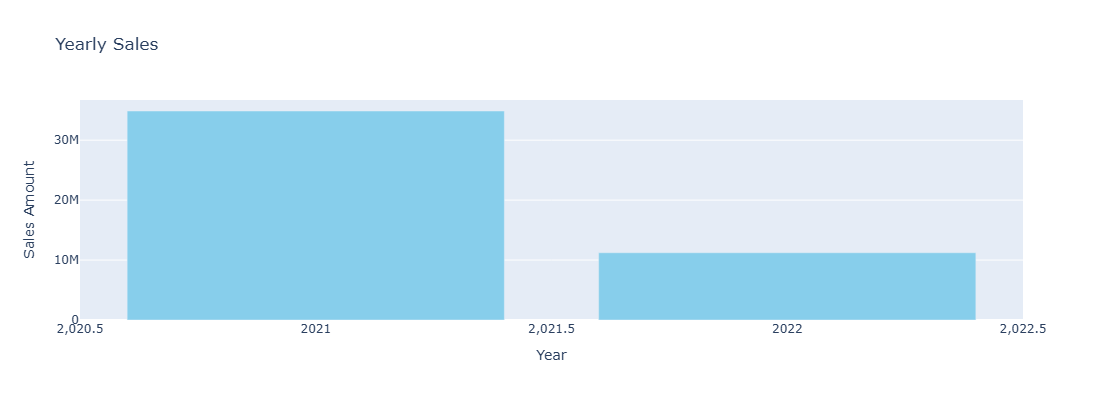

In [32]:
import plotly.express as px

fig = px.bar(
    x=yearly_sales.index,
    y=yearly_sales.values,
    labels={"x": "Year", "y": "Sales Amount"},
    title="Yearly Sales",
    color_discrete_sequence=["skyblue"]
)
fig.update_layout(width=600, height=400)
fig.show()


**QUARTERLY SALES**

In 2021, sales were in all the 4 quarters but in 2022, sales occured only in the first quarter, yet to know which months. So this explains why in 2022 sales were less than in 2021.

In 2021, Q1 had 7,491,281, in Q2 they reduced to 5,374,404, in Q3 they raised to 8,351,259, in Q4 they raised to  13,651,148.  Why did they drop in Q2 and why the increase in the 2 consecutive quarters(Q3 and Q4)?

In 2022, the sales dropped to 11,218,795 in the first quarter. Why the drop?

In [35]:
quarterly_sales=df.groupby(["Quarter","Year"])["Sales_Amount"].sum().reset_index()
print(quarterly_sales)


  Quarter  Year  Sales_Amount
0      Q1  2021     7491281.0
1      Q1  2022    11218795.0
2      Q2  2021     5374404.0
3      Q3  2021     8351259.0
4      Q4  2021    13651148.0


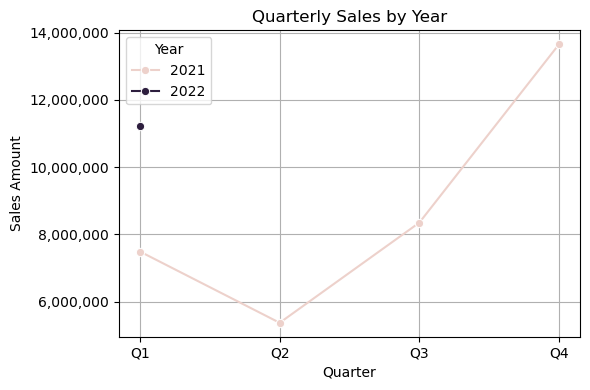

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.figure(figsize=(6, 4))
sns.lineplot(data=quarterly_sales, x="Quarter", y="Sales_Amount", hue="Year", marker='o')
plt.title("Quarterly Sales by Year")
plt.ylabel("Sales Amount")
# Add comma format to Y-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.tight_layout()
plt.show()


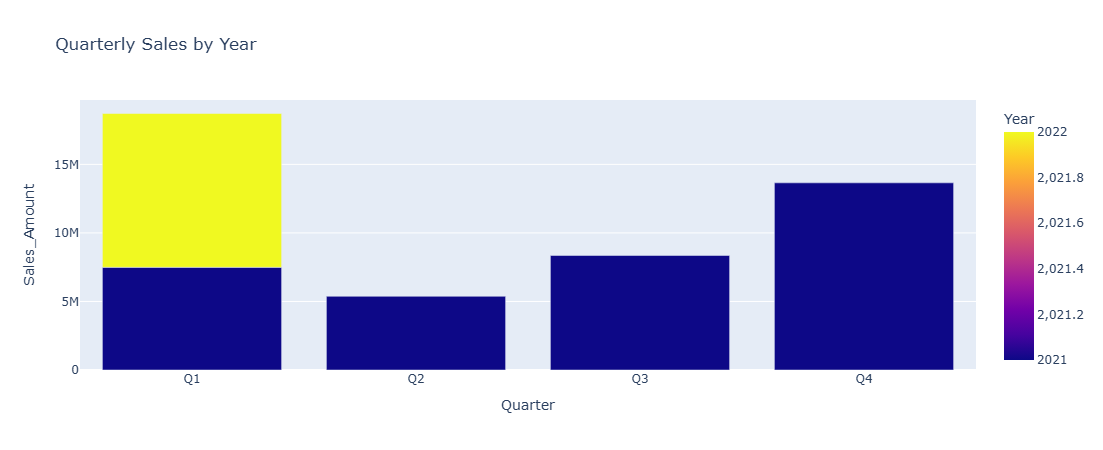

In [39]:
import plotly.express as px

fig = px.bar(
    quarterly_sales,
    x="Quarter",
    y="Sales_Amount",
    color="Year",
    barmode="group",
    title="Quarterly Sales by Year"
)
fig.update_layout(width=700, height=450)
fig.show()


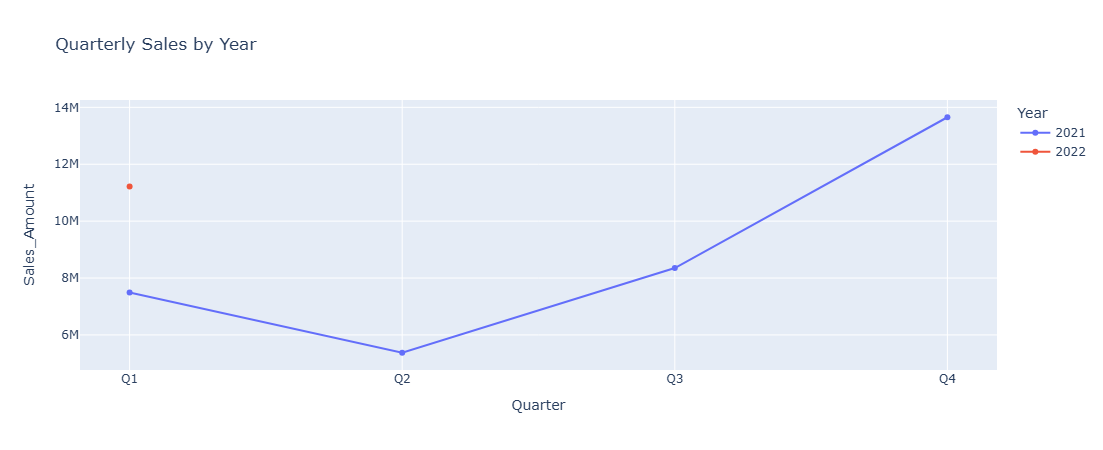

In [41]:
fig = px.line(
    quarterly_sales,
    x="Quarter",
    y="Sales_Amount",
    markers=True,
    color="Year",
    title="Quarterly Sales by Year"
)
fig.update_layout(width=700, height=450)
fig.show()


**MONTHLY SALES**

There is high sales from October 2021 to February 2022.

The sales seems to drop from March 2021 to May 2021. Slowly rises from June 2021 to August 2021 but drops slightly in September before rising in october to January the following year. 



In [44]:
monthly_sales=df.groupby(["Year","Month"])["Sales_Amount"].sum()
monthly_sales = monthly_sales.reset_index()
print(monthly_sales)
#monthly_sales.plot()

    Year Month  Sales_Amount
0   2021   Apr     2736545.0
1   2021   Aug     3144253.0
2   2021   Dec     4526641.0
3   2021   Feb     2586024.0
4   2021   Jan     1752583.0
5   2021   Jul     2682596.0
6   2021   Jun     1337840.0
7   2021   Mar     3152674.0
8   2021   May     1300019.0
9   2021   Nov     4977665.0
10  2021   Oct     4146842.0
11  2021   Sep     2524410.0
12  2022   Feb     4218242.0
13  2022   Jan     4805437.0
14  2022   Mar     2195116.0


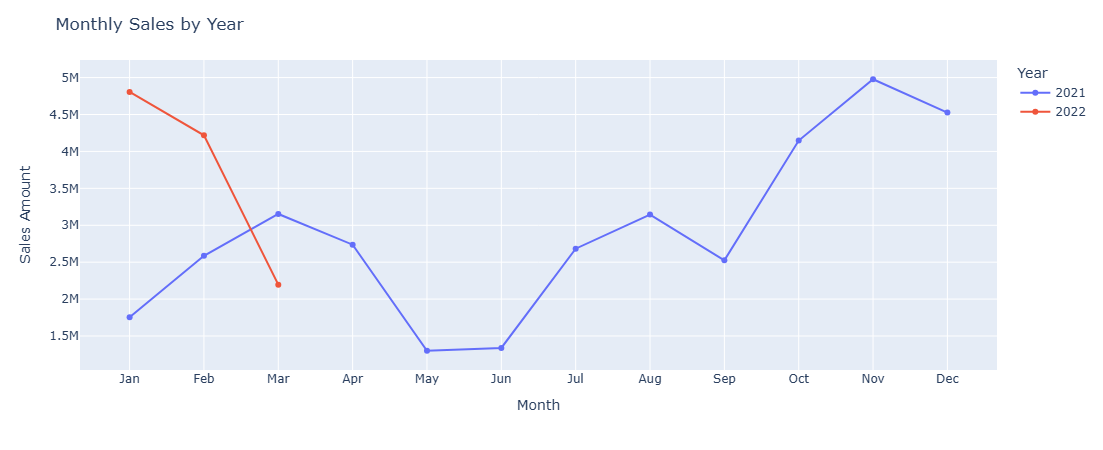

In [46]:
# Define the correct order of months
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

#Set 'Month' as a categorical column with the correct order
monthly_sales["Month"] = pd.Categorical(monthly_sales["Month"], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(["Year", "Month"])
fig=px.line(
    monthly_sales,
    x="Month",
    y="Sales_Amount",
    markers=True,
    color="Year"
    
)

fig.update_layout(
    width=600,
    height=450,
    title="Monthly Sales by Year",
    xaxis_title="Month",
    yaxis_title="Sales Amount"
)

fig.show()

**WEEKLY SALES**


In [48]:
weekly_sales=df.groupby(["Year","Week"])["Sales_Amount"].sum().reset_index().head(20).sort_values(["Year","Week"])
weekly_sales

,Year,Week,Sales_Amount
0,2021,Wk1,163415.0
1,2021,Wk10,502887.0
2,2021,Wk11,768663.0
3,2021,Wk12,862771.0
4,2021,Wk13,618093.0
5,2021,Wk14,631036.0
6,2021,Wk15,605829.0
7,2021,Wk16,679812.0
8,2021,Wk17,600880.0
9,2021,Wk18,619248.0


**SALES PER COUNTRY**

Australia is leading with 7,895,097 followed by New Zealand then Canada while UK is the least.

In [66]:
total_countries=df["Country"].nunique()
print("Total countries:",total_countries)

country_names=df["Country"].unique()
print("Countries:",country_names)

sales_country=df.groupby("Country")["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(sales_country)

Total countries: 6
Countries: ['UK' 'India' 'Canada' 'USA' 'New Zealand' 'Australia']
       Country  Sales_Amount
0    Australia     7895097.0
1  New Zealand     7815955.0
2       Canada     7761551.0
3          USA     7618989.0
4        India     7507710.0
5           UK     7487585.0


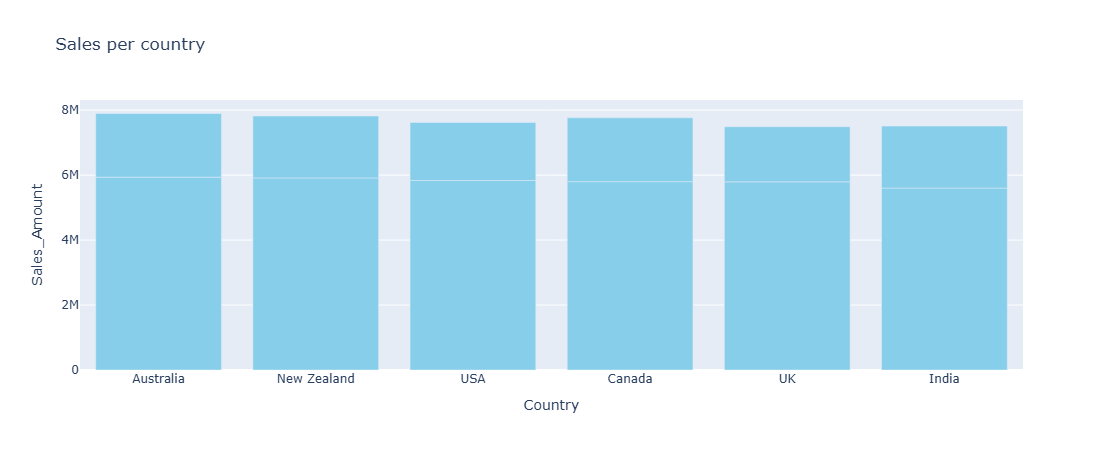

In [171]:
fig = px.bar(
    sales_country,
    x="Country",
    y="Sales_Amount",
    title="Sales per country",
    color_discrete_sequence=["skyblue"]
   
   
)
fig.update_layout(
    width=700, 
    height=450,
    xaxis_title="Country",
    
    
)
fig.show()

In 2021, Australia is leading followed by New Zealand but India is the least.

In 2022,Canada is leading followed by Australia as UK becomes the least.

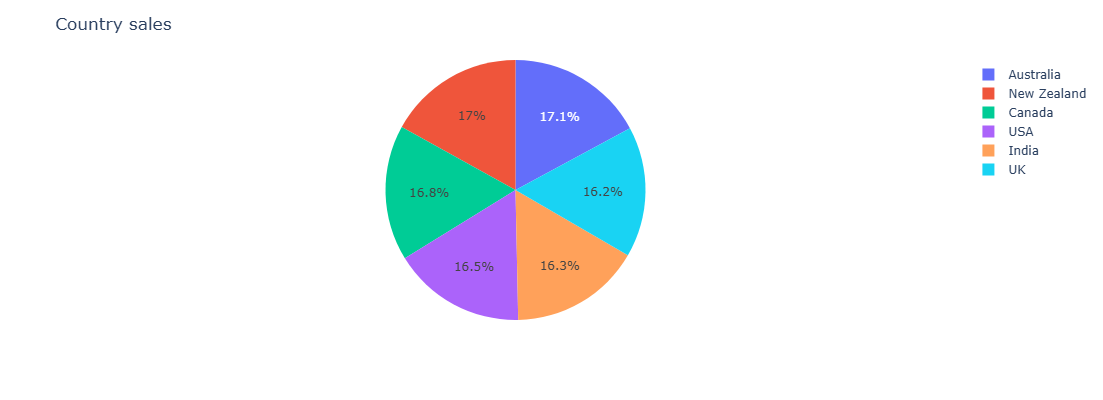

In [92]:
fig=px.pie(
    sales_country,
    names="Country",
    values="Sales_Amount"
    
)
fig.update_layout(
    title="Country sales",
    width=600,
    height=400
    
)
fig.show()

In [94]:
sales_country=df.groupby(["Year","Country"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
sales_country

,Year,Country,Sales_Amount
0,2021,Australia,5935643.0
1,2021,New Zealand,5911283.0
2,2021,USA,5832176.0
3,2021,Canada,5798030.0
4,2021,UK,5790743.0
5,2021,India,5600217.0
6,2022,Canada,1963521.0
7,2022,Australia,1959454.0
8,2022,India,1907493.0
9,2022,New Zealand,1904672.0


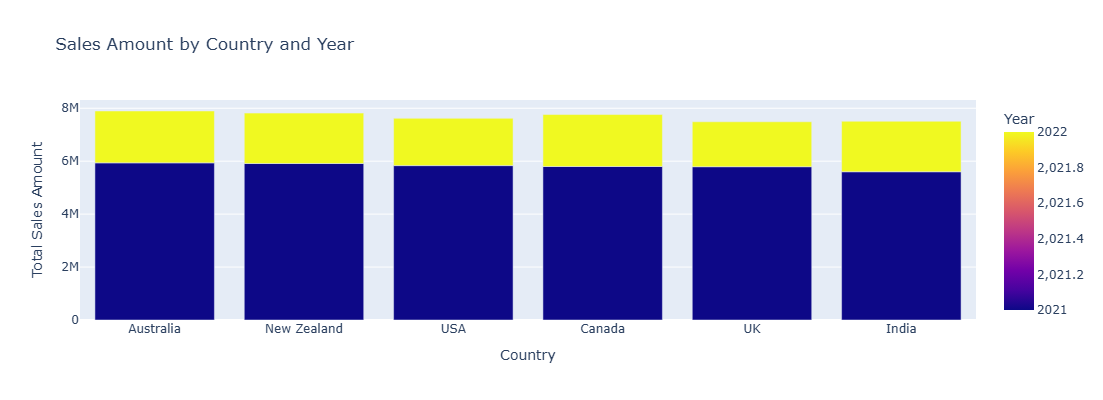

In [116]:
fig = px.bar(sales_country,
             x='Country',
             y='Sales_Amount',
             color='Year',
             barmode='stack',
             title='Sales Amount by Country and Year')

fig.update_layout(xaxis_title='Country',
                  yaxis_title='Total Sales Amount',
                  width=600,
                  height=400
                  
                 )
fig.show()


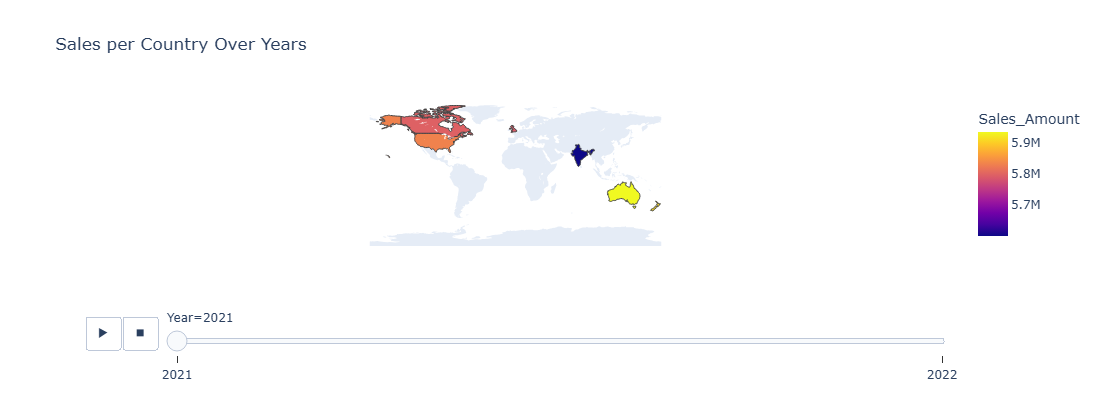

In [122]:
fig = px.choropleth(sales_country,
                    locations='Country',
                    locationmode='country names',
                    color='Sales_Amount',
                    animation_frame='Year',
                    title='Sales per Country Over Years')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False),width=600,height=400)
fig.show()


**SALES PER REGION**

From my research, Sydney is a city in Australia which is in APAC region, so I'll replace Sydney with APAC.

Toronto is also a city in Canada which is in Americas, so I'll replace Toronto with Americas.


APAC region is leading with 23,218,762. It's countries include Australia ,India and New Zealand.

Americas is the second one with 15,380,540. It's countries include Canada and USA.

Europe is the least with 7,487,585. It only has UK.

In [133]:
county_region=df.groupby("Country")["Region"].unique()
print(county_region)
print()

df["Region"]=df["Region"].replace({'Sydney':'APAC','Toronto':'Americas'})
new_regions=df.groupby("Country")["Region"].unique()
print(new_regions)


Country
Australia          [APAC]
Canada         [Americas]
India              [APAC]
New Zealand        [APAC]
UK               [Europe]
USA            [Americas]
Name: Region, dtype: object

Country
Australia          [APAC]
Canada         [Americas]
India              [APAC]
New Zealand        [APAC]
UK               [Europe]
USA            [Americas]
Name: Region, dtype: object


In [155]:
new_regions=df["Region"].nunique()
print("New No. of regions:",new_regions)
print()

new_regions=df["Region"].unique()
print("New list of regions:",new_regions)
print()

country_counts=df.groupby("Region")["Country"].nunique().reset_index()
print(country_counts)
print()

region_sales=df.groupby("Region")["Sales_Amount"].sum().reset_index()
print(region_sales)



New No. of regions: 3

New list of regions: ['Europe' 'APAC' 'Americas']

     Region  Country
0      APAC        3
1  Americas        2
2    Europe        1

     Region  Sales_Amount
0      APAC    23218762.0
1  Americas    15380540.0
2    Europe     7487585.0


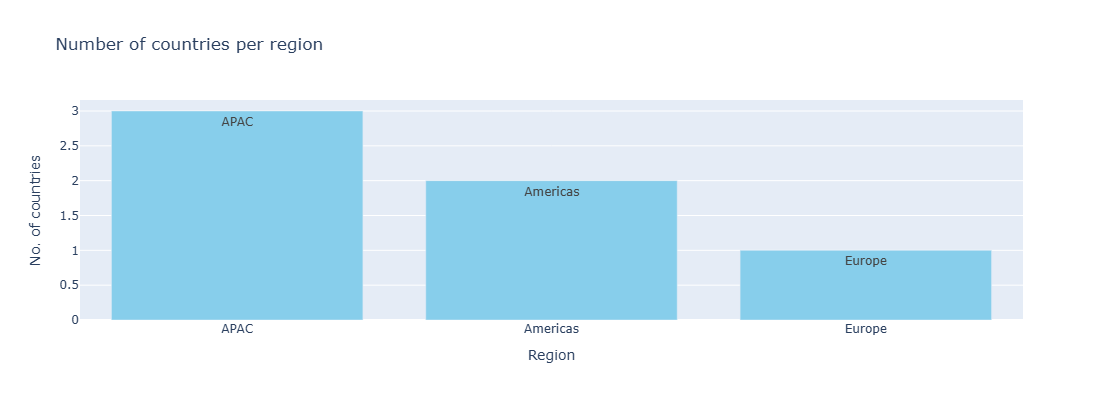

In [173]:
import plotly.express as px

fig = px.bar(country_counts,
             x="Region",
             y="Country",
             title="Number of countries per region",
             text="Region",
             color_discrete_sequence=["skyblue"]
            )

fig.update_layout(yaxis_title="No. of countries",
                  xaxis_title="Region",
                  width=600,
                  height=400
                 )
fig.show()


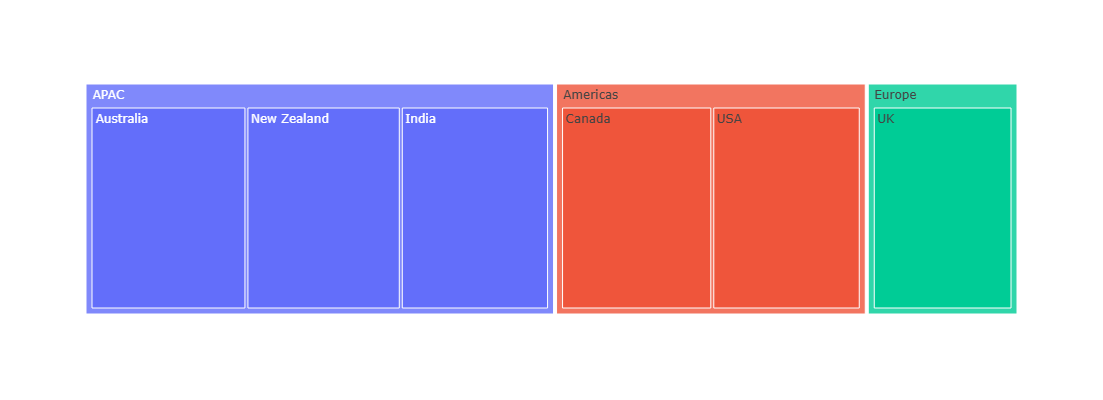

In [190]:
fig = px.treemap(df, path=['Region', 'Country'], values='Sales_Amount')
fig.update_layout(width=600,height=400)
fig.show()


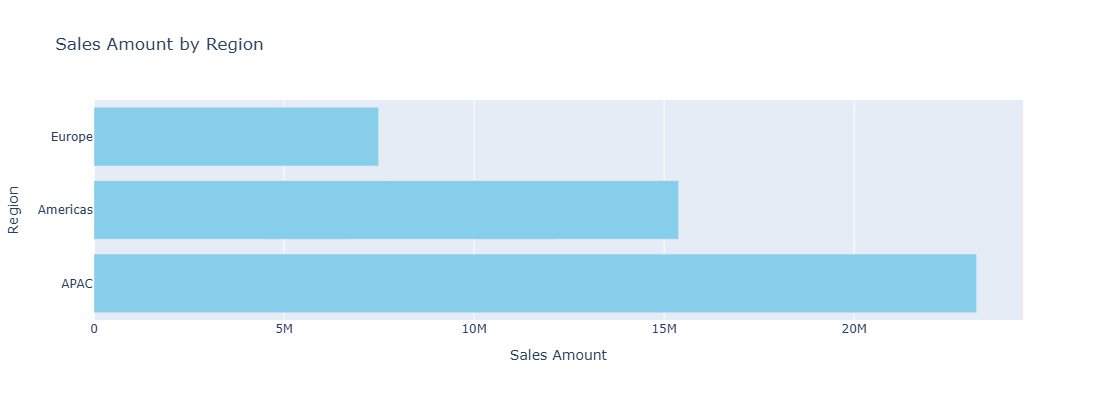

In [175]:
fig = px.bar(
    region_sales,
    x="Sales_Amount",
    y="Region",
    orientation="h",
    title="Sales Amount by Region",
    color_discrete_sequence=["skyblue"]
)
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Sales Amount"
    
)
fig.show()

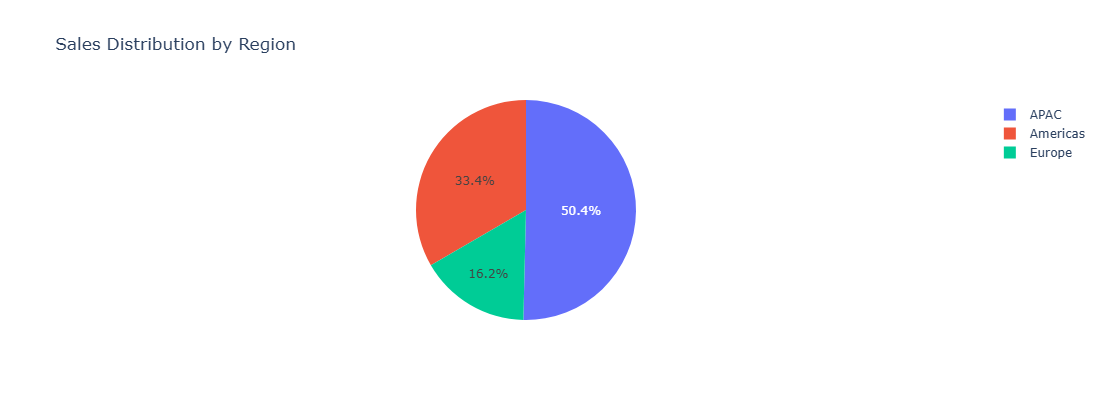

In [177]:
fig = px.pie(
    region_sales,
    names="Region",
    values="Sales_Amount",
    title="Sales Distribution by Region"
)
fig.update_layout(
    width=600,
    height=400
)
fig.show()

**SALES PER TEAM**

In each region, the teams' ranking is Julies,Delish,Yummies then Tempo in that order.

Julies has 7 sales people, Delish has 7,Yummies has 6 and Tempo has 5. This explains the ranking of their performance. But why is Julish higher than Delish yet they have same number of sales people?

In each country the perforance of each team is in this order; Julies,Delish,Yummies then Tempo except New Zealand where Delish is higher than Julies. Yet to find out why.

In 2021, in all the countries this is the order of performance Julies,Delish,Yummies then Tempo.

In 2022 there's a difference in trend.

In [192]:
team_no=df["Team"].nunique()
print("Total teams:",team_no)
print()

team_names=df["Team"].unique()
print("Teams:",team_names)
print()

Total teams: 4

Teams: ['Yummies' 'Jucies' 'Delish' 'Tempo']



In [250]:
team_performance=df.groupby("Team")["Sales_Amount"].sum().sort_values(ascending=False)
print(team_performance)
print()

region_team=df.groupby(["Region","Team"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(region_team)
print()

country_team=df.groupby(["Country","Team"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(country_team)
print()

Team
Jucies     14313152.0
Delish     13759137.0
Yummies    12259226.0
Tempo       5755372.0
Name: Sales_Amount, dtype: float64

      Region     Team  Sales_Amount
0       APAC   Jucies     7141848.0
1       APAC   Delish     6995359.0
2       APAC  Yummies     6241417.0
3   Americas   Jucies     4907637.0
4   Americas   Delish     4630227.0
5   Americas  Yummies     3933426.0
6       APAC    Tempo     2840138.0
7     Europe   Jucies     2263667.0
8     Europe   Delish     2133551.0
9     Europe  Yummies     2084383.0
10  Americas    Tempo     1909250.0
11    Europe    Tempo     1005984.0

        Country     Team  Sales_Amount
0           USA   Jucies     2507365.0
1     Australia   Jucies     2497194.0
2     Australia   Delish     2457784.0
3        Canada   Jucies     2400272.0
4         India   Jucies     2373371.0
5           USA   Delish     2365195.0
6   New Zealand   Delish     2330867.0
7   New Zealand   Jucies     2271283.0
8        Canada   Delish     2265032.0
9           

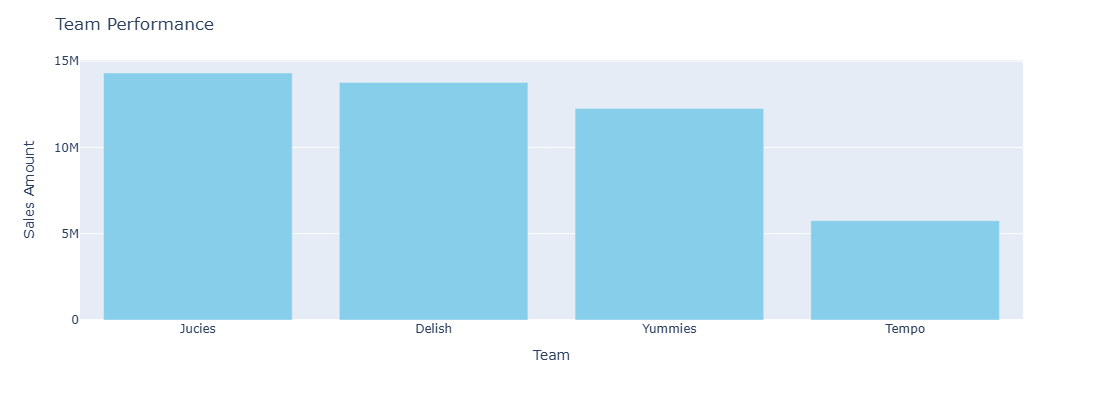

In [252]:
fig=px.bar(
    team_performance,
    x=team_performance.index,
    y=team_performance.values,
    color_discrete_sequence=["skyblue"]
    
)
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Team",
    yaxis_title="Sales Amount",
    title="Team Performance"
)
fig.show()

In [254]:
team_performance=df.groupby("Team")["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(team_performance)
print()

      Team  Sales_Amount
0   Jucies    14313152.0
1   Delish    13759137.0
2  Yummies    12259226.0
3    Tempo     5755372.0



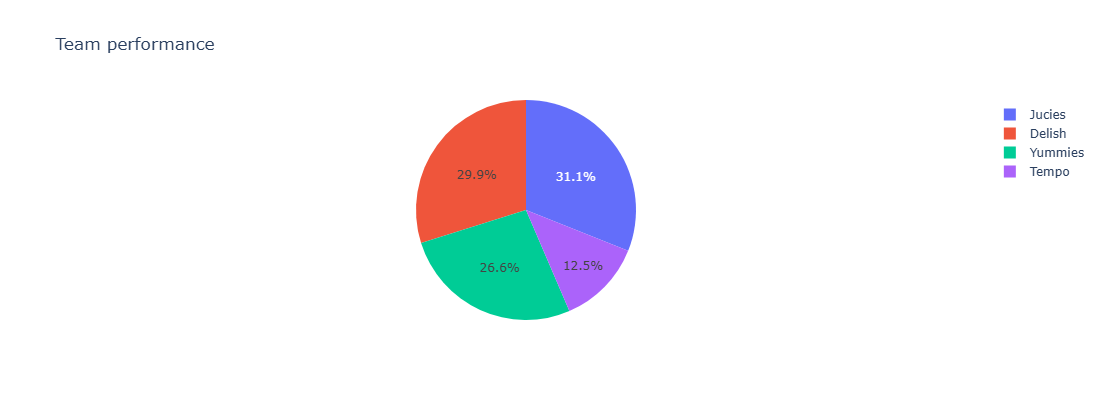

In [260]:
fig=px.pie(
    team_performance,
    names="Team",
    values="Sales_Amount",
    title="Team performance"
)
fig.update_layout(
    width=600,
    height=400
)
fig.show()

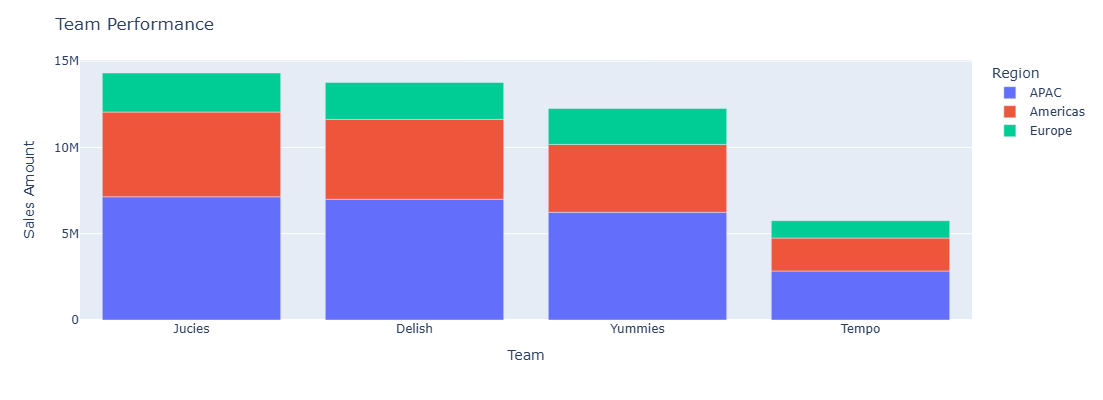

In [270]:
fig=px.bar(
    region_team,
    x="Team",
    y="Sales_Amount",
    color="Region"
    
)
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Team",
    yaxis_title="Sales Amount",
    title="Team Performance"
)
fig.show()

In [ ]:
year_country_team=df.groupby(["Year","Country","Team"])["Sales_Amount"].sum()
print(year_country_team)
print()

year_month_country_team=df.groupby(["Year","Month","Country","Team"])["Sales_Amount"].sum().reset_index()
print(year_month_country_team)
print()


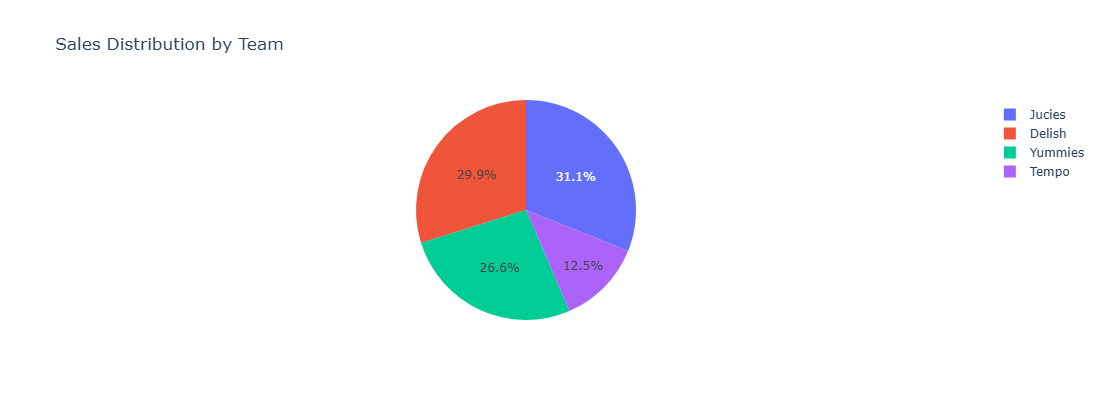

In [276]:
fig = px.pie(
    team_performance,
    names="Team",
    values="Sales_Amount",
    title="Sales Distribution per Team"
)
fig.update_layout(
    width=600,
    height=400
)
fig.show()

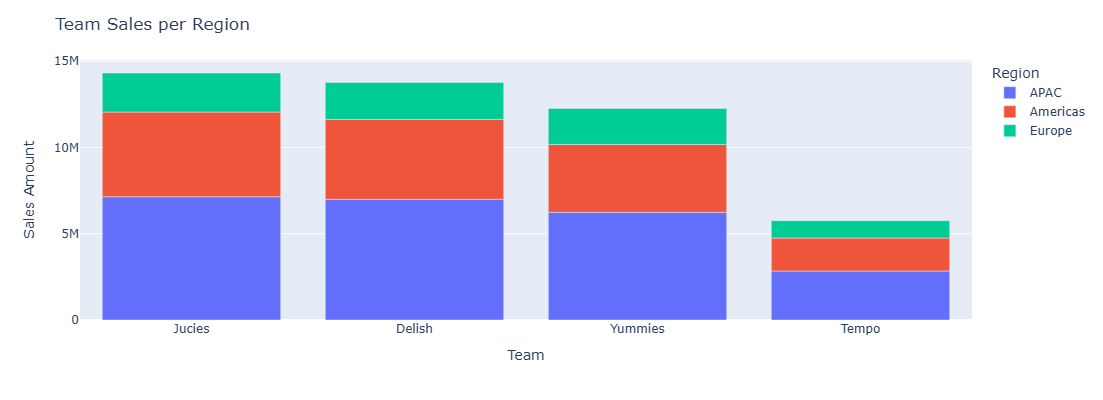

In [278]:
fig=px.bar(
    region_team,
    x="Team",
    y="Sales_Amount",
    color="Region"
    
)
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Team",
    yaxis_title="Sales Amount",
    title="Team Sales per Region"
)
fig.show()


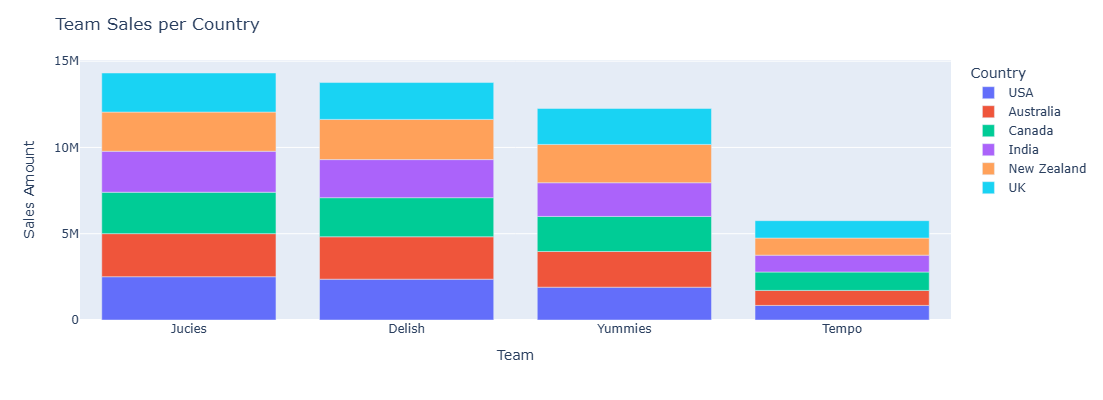

In [280]:
fig=px.bar(
    country_team,
    x="Team",
    y="Sales_Amount",
    color="Country"
    
)
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Team",
    yaxis_title="Sales Amount",
    title="Team Sales per Country"
)
fig.show()

**SALES PER SALES PERSON**

There are 25 people in total, each person is a sales person in each region.

In [398]:
no_people=df["Sales Person"].nunique()
print("Total sales people:",no_people)
print()

people_names=df["Sales Person"].unique()
print("Total sales people:",people_names)
print()

region_person=df.groupby(["Region","Sales Person"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(region_person)
print()

country_person=df.groupby(["Country","Sales Person"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(country_person.head(26))
print()



Total sales people: 25

Total sales people: ['Dennison Crosswaite' 'Kelci Walkden' 'Gigi Bohling' 'Madelene Upcott'
 'Oby Sorrel' 'Brien Boise' 'Jan Morforth' "Marney O'Breen"
 'Andria Kimpton' 'Barr Faughny' 'Husein Augar' 'Ches Bonnell'
 'Dotty Strutley' 'Curtice Advani' 'Rafaelita Blaksland' 'Kaine Padly'
 'Beverie Moffet' 'Karlen McCaffrey' "Wilone O'Kielt" 'Gunar Cockshoot'
 'Van Tuxwell' 'Camilla Castle' 'Mallorie Waber' 'Jehu Rudeforth'
 'Roddy Speechley']

    Region     Sales Person  Sales_Amount
0     APAC  Gunar Cockshoot     1177337.0
1     APAC     Jan Morforth     1080653.0
2     APAC   Beverie Moffet     1073695.0
3     APAC      Kaine Padly     1055754.0
4     APAC   Andria Kimpton     1043434.0
..     ...              ...           ...
70  Europe   Jehu Rudeforth      251538.0
71  Europe  Roddy Speechley      228648.0
72  Europe   Mallorie Waber      219961.0
73  Europe   Camilla Castle      181230.0
74  Europe      Van Tuxwell      124607.0

[75 rows x 3 columns]

   

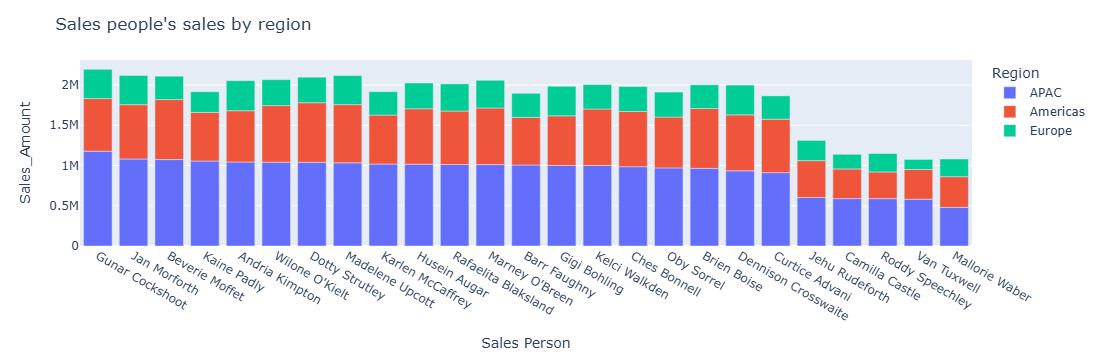

In [386]:
fig=px.bar(
    region_person,
    x="Sales Person",
    y="Sales_Amount",
    color="Region"
)
fig.update_layout(
    title="Sales people's sales by region"
)
fig.show()

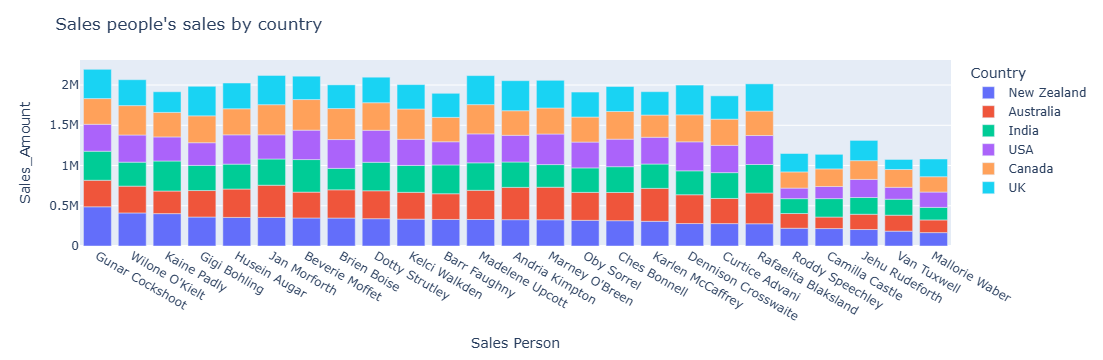

In [400]:

fig=px.bar(
    country_person,
    x="Sales Person",
    y="Sales_Amount",
    color="Country"
)
fig.update_layout(
    title="Sales people's sales by country"
)
fig.show()

In [370]:
sales_person=df.groupby(["Team","Sales Person"])["Sales_Amount"].sum().reset_index().sort_values(by="Sales_Amount")
print(sales_person)
print()
ranked_sales = df.sort_values(by='Sales_Amount', ascending=False)
top_columns = ranked_sales[['Team', 'Sales Person', 'Sales_Amount']]
print(top_columns)



print()



       Team         Sales Person  Sales_Amount
18    Tempo          Van Tuxwell     1075200.0
16    Tempo       Mallorie Waber     1080562.0
14    Tempo       Camilla Castle     1138851.0
17    Tempo      Roddy Speechley     1148987.0
15    Tempo       Jehu Rudeforth     1311772.0
3    Delish       Curtice Advani     1865157.0
19  Yummies         Barr Faughny     1896839.0
12   Jucies           Oby Sorrel     1912491.0
5    Delish          Kaine Padly     1915865.0
6    Delish     Karlen McCaffrey     1916852.0
2    Delish         Ches Bonnell     1980846.0
21  Yummies         Gigi Bohling     1983968.0
20  Yummies  Dennison Crosswaite     1999151.0
1    Delish          Brien Boise     2002231.0
9    Jucies        Kelci Walkden     2005010.0
13   Jucies  Rafaelita Blaksland     2014215.0
4    Delish         Husein Augar     2024743.0
0    Delish       Andria Kimpton     2053443.0
11   Jucies       Marney O'Breen     2058392.0
24  Yummies       Wilone O'Kielt     2065693.0
8    Jucies  

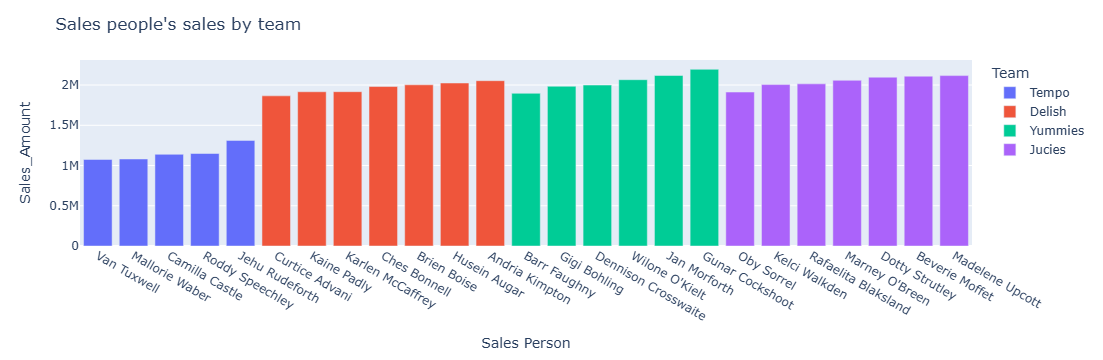

In [372]:
fig=px.bar(
    sales_person,
    x="Sales Person",
    y="Sales_Amount",
    color="Team",
   
)
fig.update_layout(
    
    title="Sales people's sales by team"
)
fig.show()

**SALES PER CATEGORY**

Bars are leading with 23,199,771 followed by Bites with  14,638,925 then other with 8,248,191.

In each region bars are leading followed by bites then other.

In each country we have the same trend.

It now makes sense, bars category has many products (11 products) thus a higher sales, bites has 7 products while others has few products(4 products) thus a low sales. If it had much products then sales would rise.

In [298]:
category_num=df["Category"].nunique()
print("Total categories:",category_num)
print()

categories=df["Category"].unique()
print("Categories:",categories)
print()

categories_sales=df.groupby("Category")["Sales_Amount"].sum().reset_index()
print(categories_sales)
print()

region_categories_sales=df.groupby(["Region","Category"])["Sales_Amount"].sum().reset_index()
print(region_categories_sales)
print()

country_categories_sales=df.groupby(["Country","Category"])["Sales_Amount"].sum().reset_index()
print(country_categories_sales)
print()

category_product=df.groupby(["Category","Product Type"])["Sales_Amount"].sum().reset_index()
category_product

Total categories: 3

Categories: ['Bars' 'Bites' 'Other']

  Category  Sales_Amount
0     Bars    23199771.0
1    Bites    14638925.0
2    Other     8248191.0

     Region Category  Sales_Amount
0      APAC     Bars    11586722.0
1      APAC    Bites     7431312.0
2      APAC    Other     4200728.0
3  Americas     Bars     7807926.0
4  Americas    Bites     4865595.0
5  Americas    Other     2707019.0
6    Europe     Bars     3805123.0
7    Europe    Bites     2342018.0
8    Europe    Other     1340444.0

        Country Category  Sales_Amount
0     Australia     Bars     4062807.0
1     Australia    Bites     2478252.0
2     Australia    Other     1354038.0
3        Canada     Bars     3909493.0
4        Canada    Bites     2404185.0
5        Canada    Other     1447873.0
6         India     Bars     3771656.0
7         India    Bites     2413033.0
8         India    Other     1323021.0
9   New Zealand     Bars     3752259.0
10  New Zealand    Bites     2540027.0
11  New Zealand    Ot

,Category,Product Type,Sales_Amount
0,Bars,85% Dark Bars,2128140.0
1,Bars,99% Dark & Pure,2145192.0
2,Bars,Almond Choco,2021208.0
3,Bars,Baker's Choco Chips,1918392.0
4,Bars,Caramel Stuffed Bars,2142966.0
5,Bars,Fruit & Nut Bars,2064153.0
6,Bars,Milk Bars,2160984.0
7,Bars,Mint Chip Choco,2024071.0
8,Bars,Orange Choco,2162601.0
9,Bars,Raspberry Choco,2117052.0


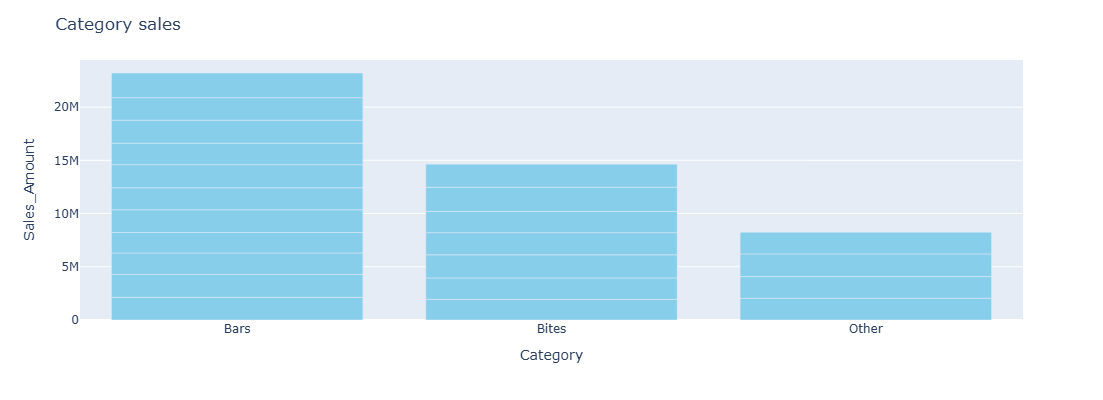

In [300]:
fig=px.bar(
    category_product,
    x="Category",
    y="Sales_Amount",
    color_discrete_sequence=["skyblue"]
)
fig.update_layout(
    title="Category sales",
    width=600,
    height=400,
    
    
)
fig.show()

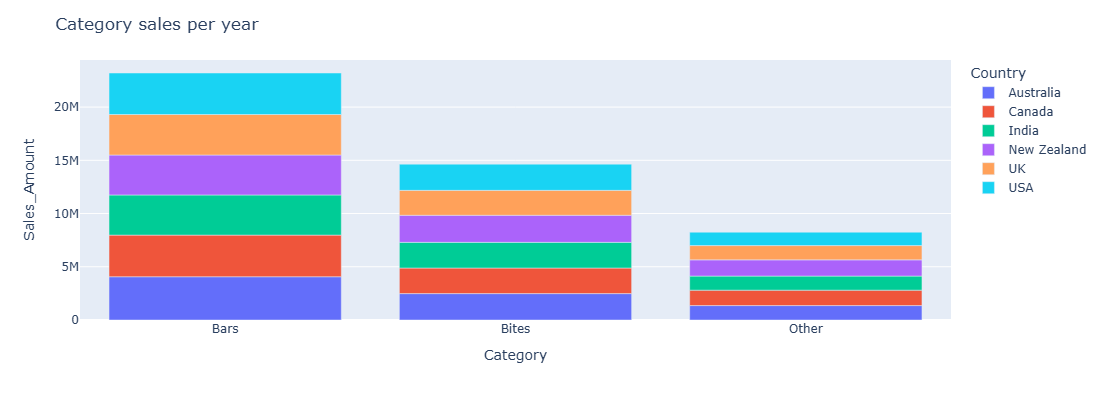

In [302]:
fig=px.bar(
    country_categories_sales,
    x="Category",
    y="Sales_Amount",
    color="Country",
    
)
fig.update_layout(
    title="Category sales per year",
    width=600,
    height=400,
    
    
)
fig.show()

**SALES PER PRODUCT TYPE**

In [352]:
total_types=df["Product Type"].nunique()
print("Total product types:",total_types)
print()

product_types=df["Product Type"].unique()
print("Product types:",product_types)
print()

product_sales=df.groupby(["Product Type"])["Sales_Amount"].sum().sort_values(ascending=False)
print(product_sales)

Total product types: 22

Product types: ['Almond Choco' 'Caramel Stuffed Bars' 'Eclairs' 'Manuka Honey Choco'
 'After Nines' 'Spicy Special Slims' '85% Dark Bars' 'White Choc'
 'Smooth Sliky Salty' 'Orange Choco' 'Mint Chip Choco'
 'Peanut Butter Cubes' '70% Dark Bites' 'Drinking Coco' 'Fruit & Nut Bars'
 'Raspberry Choco' 'Organic Choco Syrup' '99% Dark & Pure' 'Milk Bars'
 '50% Dark Bites' "Baker's Choco Chips" 'Choco Coated Almonds']

Product Type
Smooth Sliky Salty      2315012.0
Peanut Butter Cubes     2265410.0
After Nines             2174172.0
Spicy Special Slims     2168138.0
Orange Choco            2162601.0
Milk Bars               2160984.0
99% Dark & Pure         2145192.0
Caramel Stuffed Bars    2142966.0
85% Dark Bars           2128140.0
Organic Choco Syrup     2127811.0
Raspberry Choco         2117052.0
Choco Coated Almonds    2078027.0
Fruit & Nut Bars        2064153.0
Drinking Coco           2047969.0
White Choc              2045190.0
Manuka Honey Choco      2027221.0
M

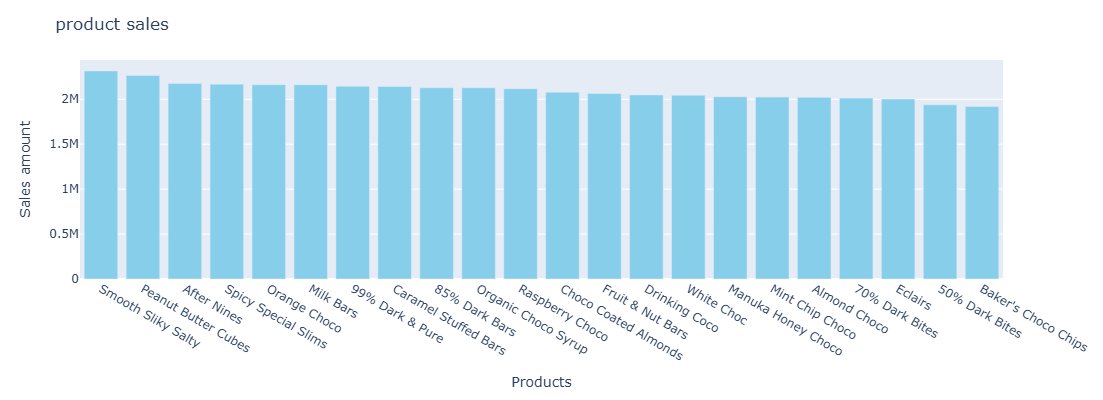

In [362]:
fig=px.bar(
    
    x=product_sales.index,
    y=product_sales.values,
    color_discrete_sequence=["skyblue"]
    
    
)
fig.update_layout(
    title="product sales",
    width=1000,
    height=400,
    xaxis_title="Products",
    yaxis_title="Sales amount"

    
    
)
fig.show()

Who's the best selling sales person?

How does the performance compare in various months?

what's the performance of products in various places at various times?

In [308]:
sales_person=df.groupby(["Sales Person"])["Sales_Amount"].sum().reset_index()
print(sales_person)
print()

           Sales Person  Sales_Amount
0        Andria Kimpton     2053443.0
1          Barr Faughny     1896839.0
2        Beverie Moffet     2109618.0
3           Brien Boise     2002231.0
4        Camilla Castle     1138851.0
5          Ches Bonnell     1980846.0
6        Curtice Advani     1865157.0
7   Dennison Crosswaite     1999151.0
8        Dotty Strutley     2096857.0
9          Gigi Bohling     1983968.0
10      Gunar Cockshoot     2195032.0
11         Husein Augar     2024743.0
12         Jan Morforth     2118543.0
13       Jehu Rudeforth     1311772.0
14          Kaine Padly     1915865.0
15     Karlen McCaffrey     1916852.0
16        Kelci Walkden     2005010.0
17      Madelene Upcott     2116569.0
18       Mallorie Waber     1080562.0
19       Marney O'Breen     2058392.0
20           Oby Sorrel     1912491.0
21  Rafaelita Blaksland     2014215.0
22      Roddy Speechley     1148987.0
23          Van Tuxwell     1075200.0
24       Wilone O'Kielt     2065693.0

